In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

# Path to your dataset zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/honeybeeSeg/HoneyBee.v1i.yolov8.zip'  # Change this path

# Directory where you want to extract the dataset
extract_dir = '/content'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check if files are extracted
print("Files extracted to:", os.listdir(extract_dir))

Files extracted to: ['.config', 'train', 'drive', 'data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'valid', 'sample_data']


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 18.9 MB/s eta 0:00:00


In [4]:
data_yaml = """
train: /content/train  # Path to training images
val: /content/valid      # Path to validation images

nc: 2  # Number of classes
names: ['eggs', 'larves']  # List of class names
"""

# Writing to a YAML file
with open('/content/data.yaml', 'w') as file:
    file.write(data_yaml)

In [5]:
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 114MB/s]


In [6]:
# Train the model
model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_custom_seg'
)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_custom_seg, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 26.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 90.2MB/s]


AMP: checks passed ✅


/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/train/labels... 172 images, 1 backgrounds, 0 corrupt: 100%|██████████| 172/172 [00:00<00:00, 1263.56it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<00:00, 921.38it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/segment/yolov8_custom_seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/yolov8_custom_seg
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.81G      1.241      6.342       3.04      1.592         37        640: 100%|██████████| 11/11 [00:11<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         74         74    0.00706          1      0.873      0.512    0.00706          1      0.873      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.76G     0.6709      1.183      1.633      1.151         39        640: 100%|██████████| 11/11 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         74         74          1      0.158      0.994      0.881          1      0.158      0.994      0.896



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.76G       0.69      1.018      1.103      1.151         38        640: 100%|██████████| 11/11 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         74         74      0.986      0.959      0.993      0.839      0.986      0.959      0.993      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.76G     0.6321     0.9938     0.9845      1.109         40        640: 100%|██████████| 11/11 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         74         74      0.972          1      0.993      0.811      0.972          1      0.993      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.76G     0.6538     0.9455      0.932      1.122         31        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         74         74      0.998          1      0.995       0.66      0.998          1      0.995      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.78G     0.5864     0.9152     0.8769      1.052         35        640: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         74         74      0.963      0.986      0.993      0.761      0.963      0.986      0.993      0.883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.76G     0.6126     0.7981     0.8345        1.1         44        640: 100%|██████████| 11/11 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         74         74      0.999          1      0.995      0.868      0.999          1      0.995      0.884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.8G     0.6419     0.9926     0.8803      1.134         38        640: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74         74      0.995          1      0.995      0.741      0.995          1      0.995      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.76G     0.5848     0.7537     0.7801      1.082         38        640: 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         74         74          1      0.997      0.995      0.542          1      0.997      0.995      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.82G     0.6254     0.7728     0.7591      1.102         30        640: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         74         74      0.984          1      0.995      0.853      0.984          1      0.995      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.76G     0.6253     0.8646      0.756      1.084         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         74         74      0.616      0.838      0.745      0.339      0.601      0.851      0.747      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.78G       0.61     0.7749     0.7143      1.073         33        640: 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         74         74      0.945          1      0.985      0.743      0.945          1      0.985      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.74G     0.5902     0.8755      0.704      1.072         36        640: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         74         74      0.959          1      0.989      0.695      0.959          1      0.989      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.76G     0.5894      1.007     0.6656      1.086         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         74         74       0.91      0.973      0.976      0.864       0.91      0.973      0.976      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.74G     0.5927     0.8316      0.647      1.075         33        640: 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         74         74      0.959          1      0.987      0.916      0.959          1      0.987       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.76G     0.6073      0.983     0.6867      1.088         42        640: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         74         74      0.997          1      0.995       0.88      0.997          1      0.995      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.78G     0.5807     0.8786     0.6233      1.056         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         74         74      0.999          1      0.995      0.896      0.999          1      0.995      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.78G     0.5076     0.7627      0.545      1.035         37        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         74         74      0.998          1      0.995      0.924      0.998          1      0.995      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.76G     0.5554     0.7172     0.5364      1.067         38        640: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         74         74      0.998          1      0.995      0.926      0.998          1      0.995       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.76G     0.5583     0.7061     0.5708      1.059         37        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         74         74      0.999          1      0.995      0.895      0.999          1      0.995      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.74G     0.5888     0.9459     0.5769      1.052         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         74         74          1      0.985      0.995      0.869          1      0.985      0.995      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.78G     0.5915     0.8056     0.5731      1.056         39        640: 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         74         74      0.999          1      0.995      0.872      0.999          1      0.995      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.78G     0.5477     0.6421     0.5362      1.058         36        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         74         74      0.998          1      0.995      0.909      0.998          1      0.995       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.74G     0.5299     0.7104     0.5419      1.041         39        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         74         74      0.997          1      0.995      0.896      0.997          1      0.995      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.76G     0.5152     0.7102     0.4976      1.025         40        640: 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         74         74      0.998          1      0.995       0.95      0.998          1      0.995      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.78G      0.549     0.8129        0.5      1.029         35        640: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         74         74      0.997          1      0.995      0.936      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.78G     0.5225     0.7624     0.5033      1.029         33        640: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         74         74      0.991          1      0.995      0.911      0.991          1      0.995       0.95



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.76G     0.5127      0.701     0.4949      1.037         39        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         74         74      0.966          1      0.994      0.902      0.966          1      0.994      0.964



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.76G     0.5281     0.8136     0.5121      1.046         33        640: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all         74         74      0.999          1      0.995      0.936      0.999          1      0.995       0.97



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.78G     0.4669     0.7359      0.464      1.022         29        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         74         74      0.999          1      0.995      0.913      0.999          1      0.995      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.78G     0.5222     0.7265     0.4672      1.052         34        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         74         74      0.999          1      0.995      0.927      0.999          1      0.995      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.76G     0.4993     0.7266     0.4713       1.02         36        640: 100%|██████████| 11/11 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         74         74      0.999          1      0.995      0.935      0.999          1      0.995      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.74G       0.52     0.7127     0.4875      1.034         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         74         74      0.999          1      0.995      0.945      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.76G     0.5115     0.6793     0.4733      1.011         35        640: 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         74         74      0.999          1      0.995      0.926      0.999          1      0.995      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.76G     0.4774     0.7171     0.4382      1.003         34        640: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         74         74      0.959      0.949       0.99      0.915      0.959      0.949       0.99      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.78G     0.4888      0.696     0.4806      1.022         33        640: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         74         74      0.986      0.972      0.994       0.91      0.986      0.972      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.78G     0.4916     0.7055      0.437      1.017         37        640: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74         74      0.999          1      0.995      0.934      0.999          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.76G     0.4337      0.722      0.407     0.9981         30        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         74         74      0.999          1      0.995       0.93      0.999          1      0.995      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.78G     0.4556     0.7764     0.4367     0.9863         34        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         74         74      0.999          1      0.995      0.927      0.999          1      0.995      0.942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.76G     0.5024     0.7484     0.4379      1.027         39        640: 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


                   all         74         74      0.999          1      0.995      0.937      0.999          1      0.995      0.953
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.84G     0.4105     0.7873     0.8064      1.004         12        640: 100%|██████████| 11/11 [00:06<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         74         74      0.999          1      0.995      0.917      0.999          1      0.995      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.69G     0.4236     0.7945     0.7523      1.031         13        640: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         74         74      0.999          1      0.995      0.931      0.999          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.69G     0.4444     0.8011     0.6779      1.009         12        640: 100%|██████████| 11/11 [00:04<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


                   all         74         74      0.999          1      0.995      0.929      0.999          1      0.995      0.957

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.69G     0.4368     0.7569     0.6612     0.9837         11        640: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         74         74      0.999          1      0.995      0.912      0.999          1      0.995      0.952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.69G     0.4153     0.7445     0.5983     0.9709         12        640: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         74         74      0.999          1      0.995      0.927      0.999          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.69G     0.4117     0.7541     0.6571          1         11        640: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74         74      0.999          1      0.995      0.926      0.999          1      0.995      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.69G     0.3719     0.7235     0.5645     0.9538         12        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         74         74      0.999          1      0.995      0.931      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.69G     0.3544     0.6402     0.5263     0.9578         12        640: 100%|██████████| 11/11 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         74         74      0.999          1      0.995      0.942      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.69G     0.4265     0.8106     0.6435     0.9803         12        640: 100%|██████████| 11/11 [00:03<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         74         74      0.999          1      0.995      0.948      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.69G     0.3277     0.6182      0.508     0.9594         12        640: 100%|██████████| 11/11 [00:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         74         74      0.999          1      0.995      0.952      0.999          1      0.995      0.967



50 epochs completed in 0.083 hours.
Optimizer stripped from runs/segment/yolov8_custom_seg/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/yolov8_custom_seg/weights/best.pt, 6.8MB

Validating runs/segment/yolov8_custom_seg/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


                   all         74         74      0.999          1      0.995      0.953      0.999          1      0.995      0.967
                larves         74         74      0.999          1      0.995      0.953      0.999          1      0.995      0.967
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/segment/yolov8_custom_seg


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcb7c8d37f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [7]:
# Evaluate the trained model
metrics = model.val()
print(metrics)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


                   all         74         74      0.999          1      0.995      0.952      0.999          1      0.995      0.967
                larves         74         74      0.999          1      0.995      0.952      0.999          1      0.995      0.967
Speed: 0.9ms preprocess, 19.6ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/segment/yolov8_custom_seg2
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcb7c273e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,

In [8]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/honeybeeSeg/yolov8_custom_seg.pt')

In [9]:
# Evaluate the model
metrics = model.val()

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


                   all         74         74      0.999          1      0.995      0.952      0.999          1      0.995      0.967
                larves         74         74      0.999          1      0.995      0.952      0.999          1      0.995      0.967
Speed: 0.4ms preprocess, 10.1ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs/segment/yolov8_custom_seg3


In [14]:
print("Performance Metrics:")
for key, value in metrics.results_dict.items():  # Access results_dict as an attribute
    print(f"{key}: {value:.4f}")

Performance Metrics:
metrics/precision(B): 0.9992
metrics/recall(B): 1.0000
metrics/mAP50(B): 0.9950
metrics/mAP50-95(B): 0.9520
metrics/precision(M): 0.9992
metrics/recall(M): 1.0000
metrics/mAP50(M): 0.9950
metrics/mAP50-95(M): 0.9669
fitness: 1.9260


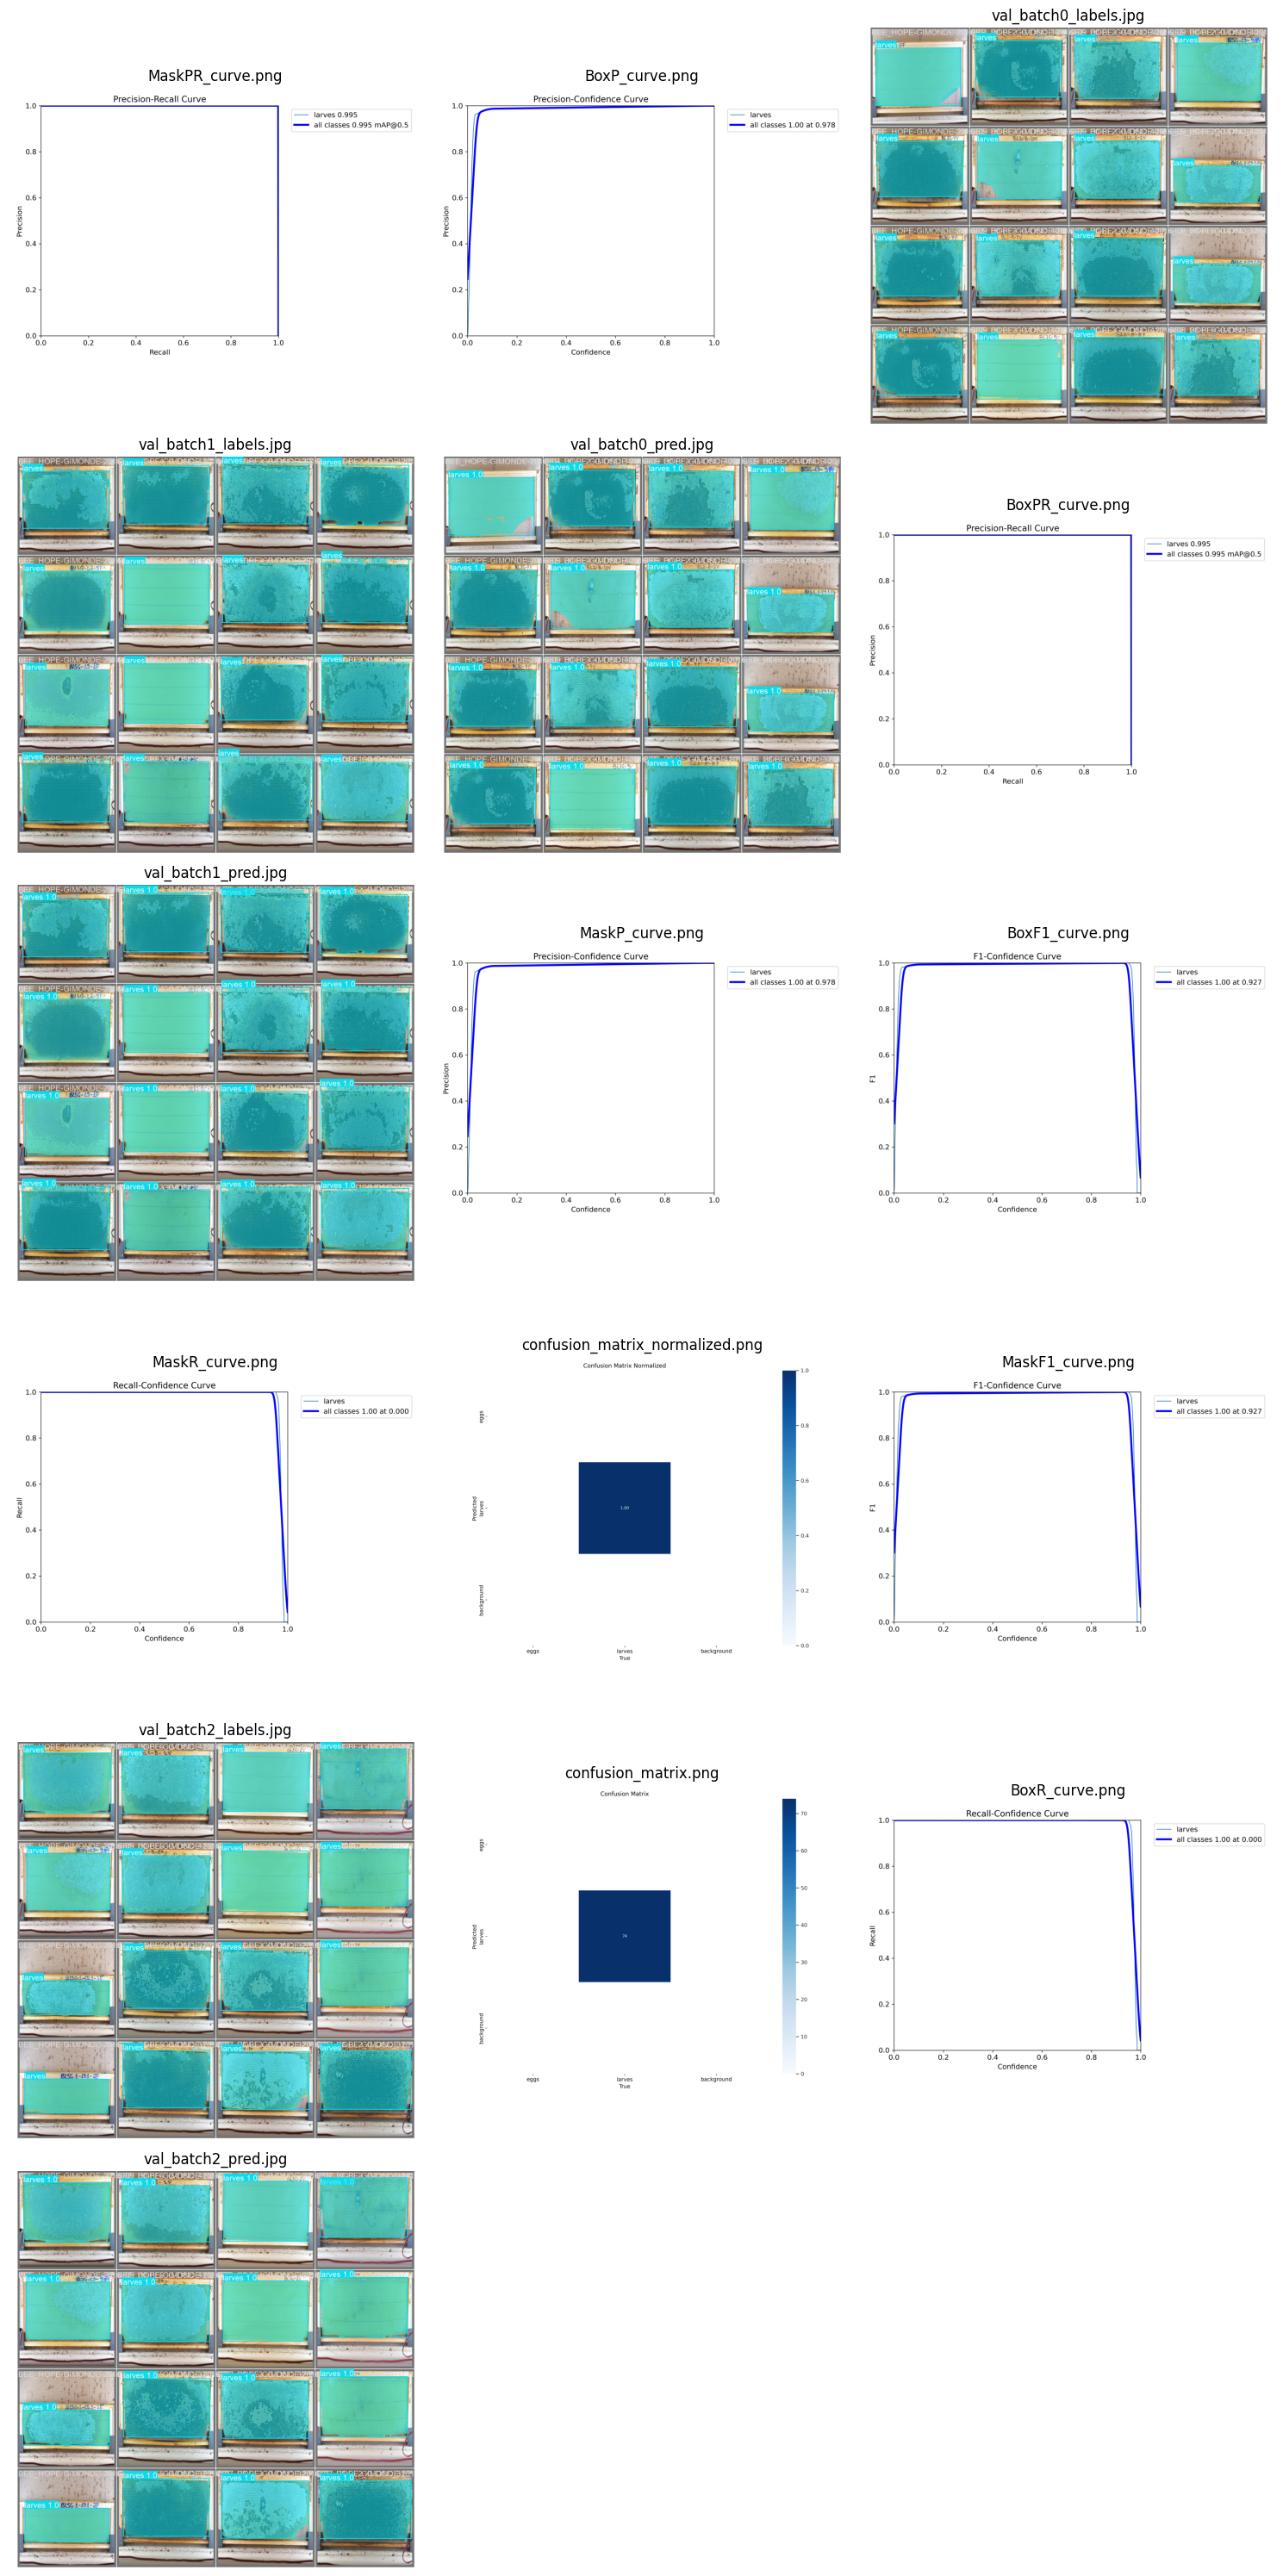

In [17]:
import os
import cv2
import matplotlib.pyplot as plt

def display_segmented_outputs_as_subplots(results_dir, columns=3, image_size=(10, 10)):
    """
    This function displays the segmented images saved in the results directory as subplots.

    :param results_dir: Path to the directory containing the segmented images
    :param columns: Number of columns in the subplot grid
    :param image_size: Size of each subplot image
    """
    # Get a list of image files in the results directory
    image_files = [f for f in os.listdir(results_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Determine the number of rows based on the number of images
    rows = (len(image_files) + columns - 1) // columns

    # Create a subplot figure
    fig, axes = plt.subplots(rows, columns, figsize=(columns * image_size[0], rows * image_size[1]))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Display each segmented image in a subplot
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(results_dir, image_file)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Convert BGR (OpenCV default) to RGB for correct color display
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image on the corresponding subplot axis
        axes[i].imshow(image_rgb)
        axes[i].set_title(f"{image_file}")
        axes[i].axis('off')  # Hide axes

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
display_segmented_outputs_as_subplots('/content/runs/segment/yolov8_custom_seg3', columns=3, image_size=(5, 5))



image 1/1 /content/BEE_HOPE GIMONDE 2016_07_28 BL1_G DSC_3153.JPG: 448x640 (no detections), 11.8ms
Speed: 3.2ms preprocess, 11.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


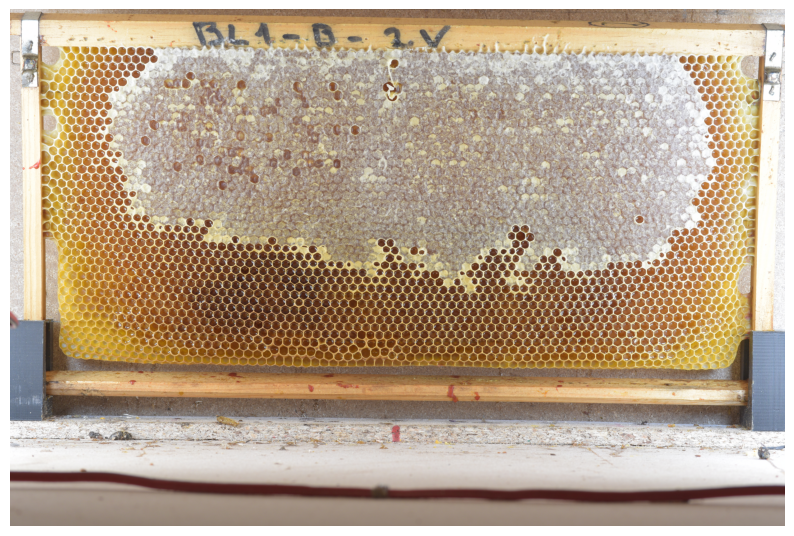

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv8 segmentation model
model = YOLO('/content/yolov8n-seg.pt')  # Replace with your model path

def segment_image(image_path):
    # Perform segmentation
    results = model.predict(source=image_path, save=False)

    # Extract the segmented image
    segmented_image = results[0].plot()

    # Convert the image from BGR to RGB for matplotlib
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

    # Display the segmented image
    plt.figure(figsize=(10, 10))
    plt.imshow(segmented_image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
segment_image('/content/BEE_HOPE GIMONDE 2016_07_28 BL1_G DSC_3153.JPG')  # Replace with the path to your image